In [2]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data1 = pd.read_csv('./divorces_2000-2015_final_db_2.csv')
data1

,Divorce_date,Type_of_divorce,Nationality_partner_man,DOB_partner_man,DOB_pm_ddmm,Zodiac_sign_man,Place_of_birth_partner_man,Birth_municipality_of_partner_man,Birth_federal_partner_man,Birth_country_partner_man,...,Marriage_certificate_municipality,Marriage_certificate_federal,Level_of_education_partner_man,Employment_status_partner_man,Level_of_education_partner_woman,Employment_status_partner_woman,Marriage_duration,Marriage_duration_months,Num_Children,Custody
0,9/6/2006,Necesario,MEXICANA,18/12/75,18-Dec,Sagittarius,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,...,XALAPA,VERACRUZ,SECUNDARIA,OBRERO,SECUNDARIA,EMPLEADO,5,NaN,1.0,NaN
1,1/2/2006,Necesario,MEXICANA,30/10/75,30-Oct,Scorpio,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PREPARATORIA,NO TRABAJA,7,NaN,2.0,MADRE
2,1/2/2007,Necesario,MEXICANA,13/12/70,13-Dec,Sagittarius,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,NO TRABAJA,15,NaN,2.0,MADRE
3,1/2/2007,Necesario,MEXICANA,17/02/75,17-Feb,Aquarius,DISTRITO FEDERAL,DISTRITO FEDERAL,DISTRITO FEDERAL,MEXICO,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,6,NaN,1.0,MADRE
4,1/2/2008,Voluntario,MEXICANA,2/12/1976,2-Dec,Sagittarius,CIUDAD MANTE,CIUDAD MANTE,TAMAULIPAS,MEXICO,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,NO TRABAJA,1,7.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3503,31/10/12,Necesario,MEXICANA,16/09/61,16-Sep,Virgo,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,SECUNDARIA,NO TRABAJA,25,NaN,3.0,MADRE
3504,31/10/12,Voluntario,MEXICANA,29/10/77,29-Oct,Scorpio,MORELIA,MORELIA,MICHOACAN,MEXICO,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,3,11.0,NaN,NaN
3505,31/10/13,Voluntario,MEXICANA,10/11/1982,10-Nov,Scorpio,VERACRUZ,VERACRUZ,VERACRUZ,MEXICO,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,1,NaN,NaN,NaN
3506,31/10/13,Voluntario,MEXICANA,28/10/54,28-Oct,Scorpio,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,35,NaN,2.0,NaN


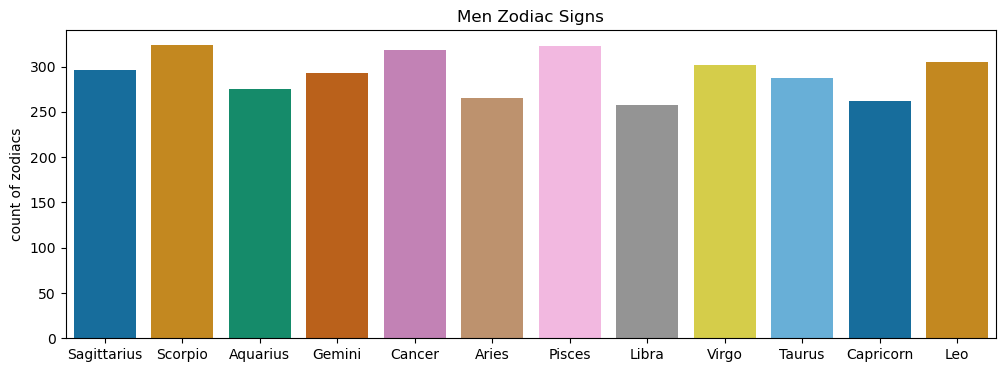

In [8]:
#COUNT Zodiac Sign for the MEN
plt.figure(figsize=(12, 4))
plot = sns.countplot(x="Zodiac_sign_man", data=data1, palette="colorblind")
plt.title('Men Zodiac Signs')
plt.xlabel("")
plt.ylabel("count of zodiacs")
plt.show()

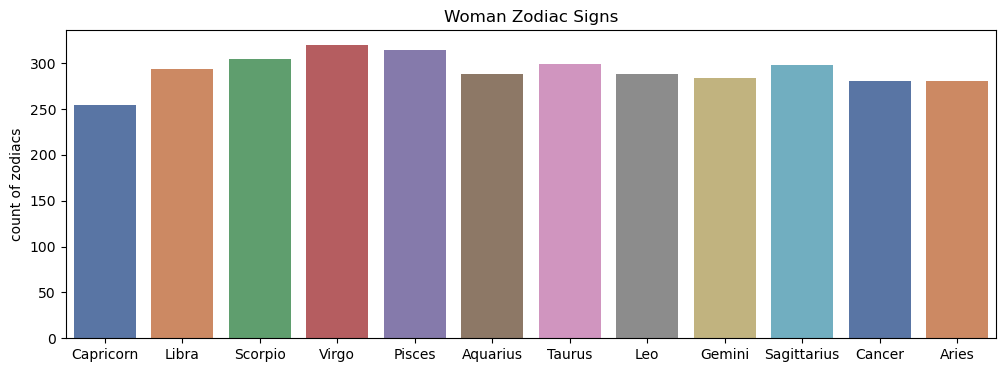

In [7]:
#COUNT Zodiac Sign for the WOMAN

plt.figure(figsize=(12, 4))
plot = sns.countplot(x="Zodiac_sign_woman", data=data1, palette="deep")
plt.title('Woman Zodiac Signs')
plt.xlabel("")
plt.ylabel("count of zodiacs")
plt.show()

In [9]:
#count each of the possible combinations of pairs by using the matrix 

div_data = pd.DataFrame(data1) 
adjacency_matrix = pd.crosstab(div_data['Zodiac_sign_man'], div_data['Zodiac_sign_woman'])

adjacency_matrix = adjacency_matrix.loc[adjacency_matrix.sum(axis=1).sort_values(ascending=False).index]
adjacency_matrix = adjacency_matrix[adjacency_matrix.sum(axis=0).sort_values(ascending=False).index]


idx = adjacency_matrix.columns.union(adjacency_matrix.index)
adjacency_matrix = adjacency_matrix.reindex(index=idx, columns=idx, fill_value=0)
print(adjacency_matrix.head(12))


             Aquarius  Aries  Cancer  Capricorn  Gemini  Leo  Libra  Pisces  \
Aquarius           20     24      17         20      27   26     18      27   
Aries              18     21      28         27      20   28     24      15   
Cancer             36     29      32         14      24   31     21      31   
Capricorn          32     21      19         17      32   29     10      21   
Gemini             22     20      18         20      22   31     28      31   
Leo                29     23      26         24      26   19     30      27   
Libra              21     14      32         18      17   16     31      19   
Pisces             30     26      14         25      28   27     28      29   
Sagittarius        22     27      17         30      16   16     29      23   
Scorpio            27     25      23         24      25   23     29      34   
Taurus             18     27      27         22      21   18     21      26   
Virgo              13     24      28         14     

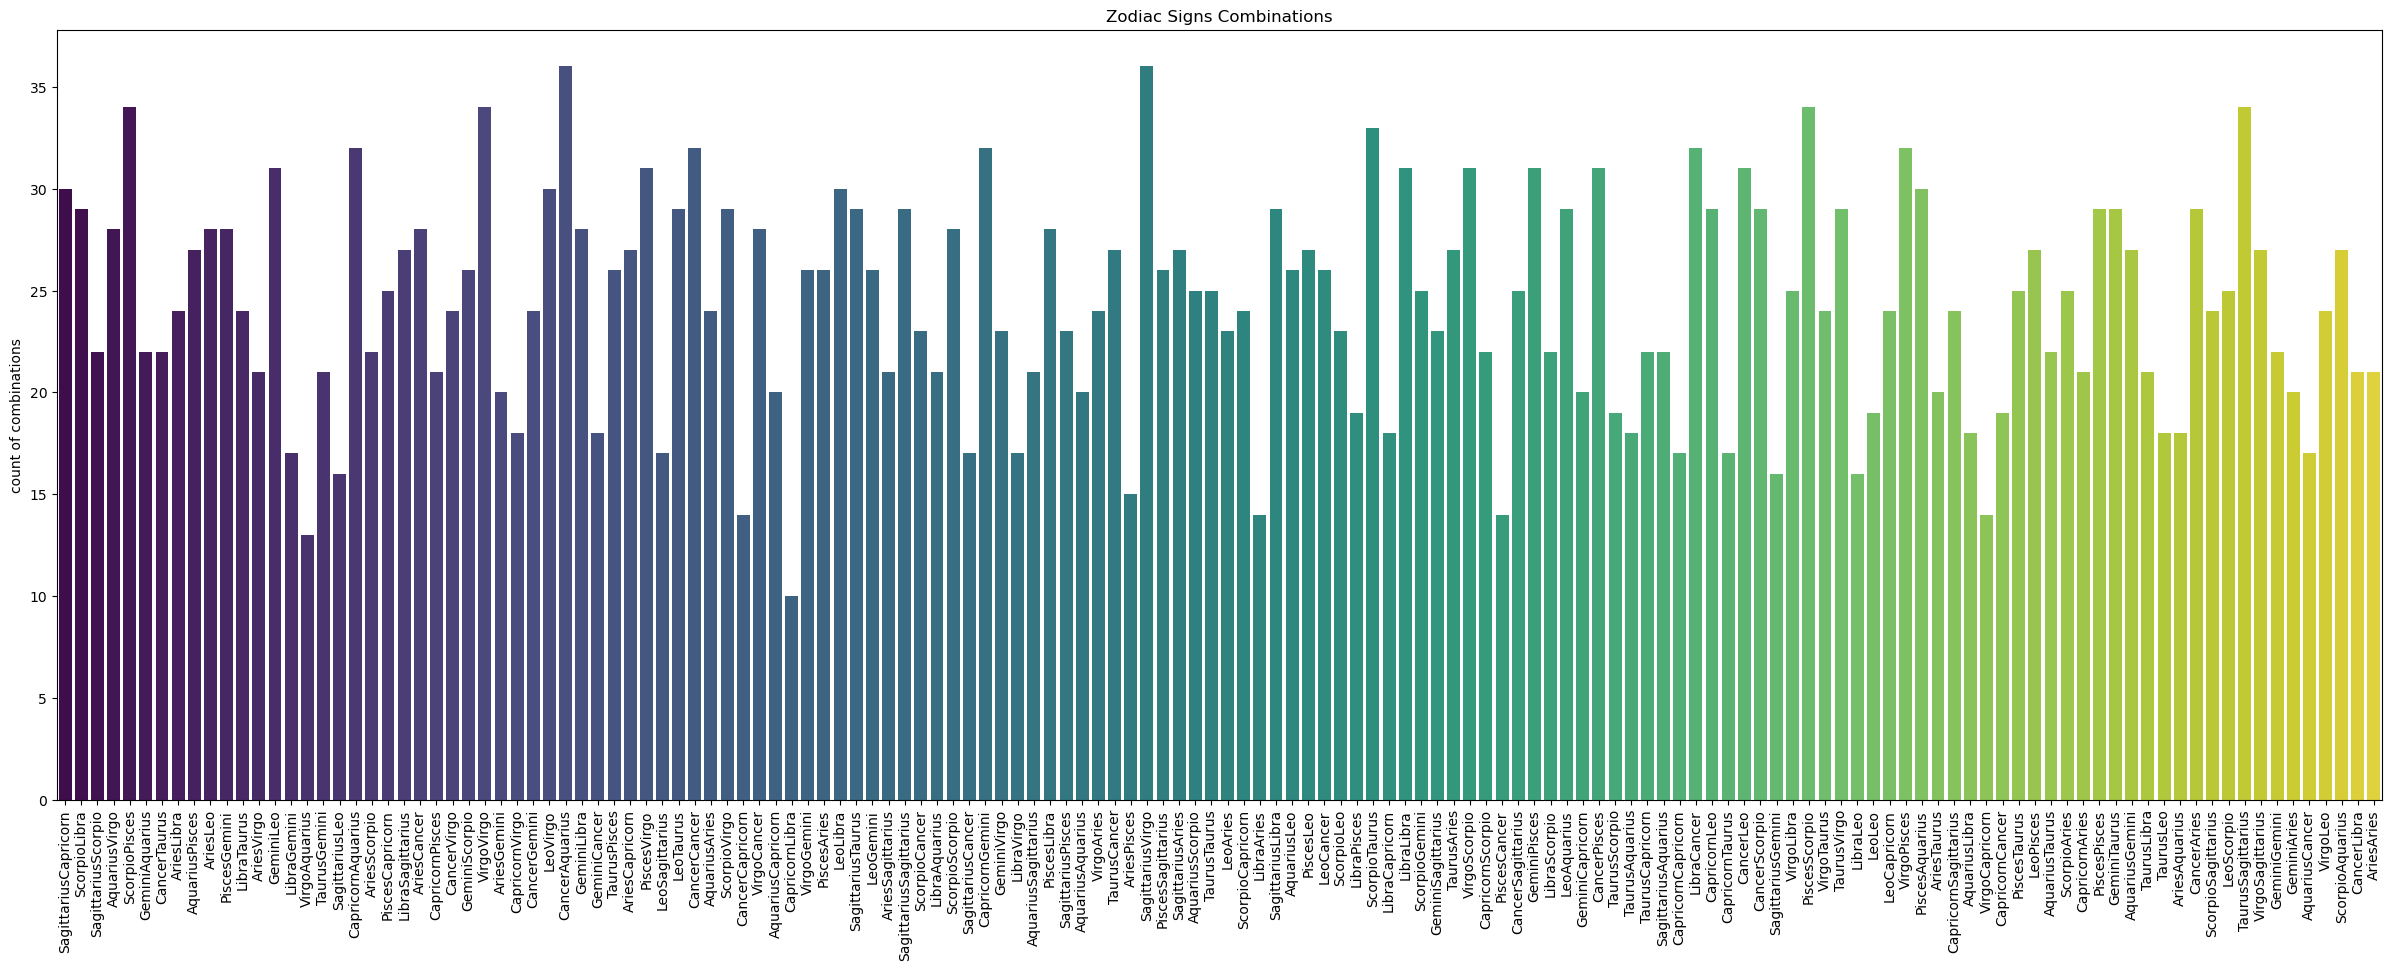

In [10]:
div_data['Zodiac_combinations'] = div_data['Zodiac_sign_man'] + div_data['Zodiac_sign_woman']


combination_counts = div_data['Zodiac_combinations'].value_counts().sort_values(ascending=False)


plt.figure(figsize=(30, 10))
plot = sns.countplot(x="Zodiac_combinations", data=div_data, palette="viridis")
plt.title('Zodiac Signs Combinations')
plt.xlabel("")
plt.ylabel("count of combinations")
plt.xticks(rotation=90)

plt.show()